# CS224W: Machine Learning with Graphs - Homework 1
Fall 2019

## Node Classification [25 points]
### 1.1 Relational Classification [10 points]
Consider the graph G as shown in Figure 1. We would like to classify nodes into 2 classes "+" and "-". Labels for node 3, 5, 8 and 10 are given (red for "+", blue for "-"). Assume all the edges have edge weight W(i; j) = 1 in this graph. For labeled nodes, initialize with the ground-truth Y labels, i.e., P(Y3 = +) = P(Y5 = +) = 1:0; P(Y8 = +) = P(Y10 = +) = 0. For unlabeled nodes, use unbiased initialization P(Yi = +) = 0:5. Update nodes by node ID in ascending order (i.e., update node 1  rst, then node 2, etc.)

- After the second iteration, give P(Yi = +) for i = 2; 4; 6. [6 points]
- If we use 0.5 as the probability threshold, i.e., consider a node i belonging to class "+" if P(Yi = +) > 0:5, which node will belong to class "+" in the end? Which will belong to class "-"? [4 points]

In [1]:
import numpy as np

In [2]:
def rel_classifier():
    # define graph as a list of lists
    graph = []
    graph.append([])  # node 0
    graph.append([2, 3])  # node 1
    graph.append([1, 3, 4]) # node 2
    graph.append([]) # node 3
    graph.append([2, 7, 8]) # node 4
    graph.append([]) # node 5
    graph.append([2, 5, 9, 10]) # node 6
    graph.append([4, 8]) # node 7
    graph.append([]) # node 8
    graph.append([5, 6, 8, 10]) # node 9
    graph.append([]) # node 10
    
    # define probabilities
    prob = [0.5] * 11
    prob[3] = 1.0
    prob[5] = 1.0
    prob[8] = 0.0
    prob[10] = 0.0

    it = 0
    change = True
    while change:
        print("========iteration %d========" % (it))
        for (node_i, node_prob) in enumerate(prob):
            print('(%d: %.2f)' % (node_i, prob[node_i]), end=',')
        change = False



        for (node_i, node_neighbors) in enumerate(graph):
            if len(node_neighbors) == 0:
                continue

            prob_new = 0.0
            for j in node_neighbors:
                prob_new += prob[j] 
            prob_new = prob_new / len(node_neighbors)    

            if abs(prob_new - prob[node_i]) > 1e-6: # if new prob ~= prob then stop iterating
                prob[node_i] = prob_new
                change = True

        it += 1


rel_classifier()


========iteration 0========
(0: 0.50),(1: 0.50),(2: 0.50),(3: 1.00),(4: 0.50),(5: 1.00),(6: 0.50),(7: 0.50),(8: 0.00),(9: 0.50),(10: 0.00),========iteration 1========
(0: 0.50),(1: 0.75),(2: 0.75),(3: 1.00),(4: 0.42),(5: 1.00),(6: 0.56),(7: 0.21),(8: 0.00),(9: 0.39),(10: 0.00),========iteration 2========
(0: 0.50),(1: 0.88),(2: 0.76),(3: 1.00),(4: 0.32),(5: 1.00),(6: 0.54),(7: 0.16),(8: 0.00),(9: 0.38),(10: 0.00),========iteration 3========
(0: 0.50),(1: 0.88),(2: 0.74),(3: 1.00),(4: 0.30),(5: 1.00),(6: 0.53),(7: 0.15),(8: 0.00),(9: 0.38),(10: 0.00),========iteration 4========
(0: 0.50),(1: 0.87),(2: 0.72),(3: 1.00),(4: 0.29),(5: 1.00),(6: 0.53),(7: 0.15),(8: 0.00),(9: 0.38),(10: 0.00),========iteration 5========
(0: 0.50),(1: 0.86),(2: 0.72),(3: 1.00),(4: 0.29),(5: 1.00),(6: 0.52),(7: 0.14),(8: 0.00),(9: 0.38),(10: 0.00),========iteration 6========
(0: 0.50),(1: 0.86),(2: 0.72),(3: 1.00),(4: 0.29),(5: 1.00),(6: 0.52),(7: 0.14),(8: 0.00),(9: 0.38),(10: 0.00),========iteration 7========

- After the second iteration, P(Yi = +) for i = 2; 4; 6 is P(Y2 = +) =0.76; P(Y4 = +) =0.32; P(Y6 = +) =0.54
- In the end nodes 1,2,3,5,6 belong to class "+" and nodes 4,7,8,9,10 belong to class "-"

### 1.2 Belief Propagation [15 points]
In this problem, we will be using Belief Propagation(BP) on Conditional Random Field to solve inference problems. Conditional Random Fields (CRF) are an important special case of Markov Random Fields to model conditional probability distribution. They define a probability distribution p over variables x1, x2,..., xn and observations y1, y2,..., ym, which in turn elicit an undirected graph G.

- Consider the network with four hidden nodes shown in Figure 3. Compute the belief at node 1, b_1(x_1), using the belief propagation rules, and write the result in terms of $\phi$'s and  $\psi$'s. [5 points]
- Prove that the belief at node 1 calculated above, b_1(x_1), is the same as the marginal probability of x1 conditioned on the observations, p(x1|y1, y2, y3, y4). [2 points]
- Write Python code to calculate b1(x1); b2(x2); b3(x3); b4(x4); b5(x5) by using a library like numpy. (You don't need to write a general BP algorithm|this coding assignment should be simply based on linear algebra, e.g., matrix multiplication, to help you calculate the belief values. It should not take you more than a few lines of code with numpy.) Is the prediction what you expected?

(i) $$  
b_1(x_1) = \frac{1}{Z}\phi_1(x_1)*m_{21}(x_1) 
= \frac{1}{Z}\phi_1(x_1)* \sum_{x_2} \phi_2(x_2) \psi_{21}(x_2,x_1) * m_{32}(x_2) * m_{42}(x_2)
= \frac{1}{Z}\phi_1(x_1)* \sum_{x_2} \phi_2(x_2) \psi_{21}(x_2,x_1) * (\sum_{x_3} \phi_3(x_3) \psi_{32}(x_3,x_2) * \sum_{x_4} \phi_4(x_4) \psi_{42}(x_4,x_2))
$$

(ii) $$
p(x_1|y_1, y_2, y_3, y_4)= p(x_1|y_1,x_2)\sum_{x_2} p(x_2|y_2,x_3,x_4) * \sum_{x_3} p(x_3|y_3) * \sum_{x_4}p(x_4|y_4)
=\frac{1}{Z_1}\phi_1(x_1) \frac{1}{Z_2}\sum_{x_2} \psi_{1,2}(x_1,x_2) \phi_2(x_2)* \frac{1}{Z_3}\sum_{x_3} \psi_{2,3}(x_2,x_3)\phi_3(x_3) * \frac{1}{Z_4}\sum_{x_4} \psi_{2,4}(x_2,x_4)*\phi_4(x_4)
$$

In [3]:
# define states for nodes 0,1,2,3,4,5
w12 = w34 = [[1,0.9],[0.9,1]]
w23 = w35 = [[0.1,1],[1,0.1]]
o2 = [1,0.1]
o4 = [0.1,1]

# calculate beliefs
b1 = np.matmul(w12, np.matmul(w23, np.sum(w35, axis=1) * np.matmul(w34,o4)) * o2)
b2 = np.matmul(w23, np.sum(w35, axis=1) * np.matmul(w34,o4)) * o2 * np.sum(w12, axis=1)
b3 = np.sum(w35, axis=1) * np.matmul(w34,o4) * np.matmul(w23, np.sum(w12, axis=1) * o2)
b4 = np.matmul(w34, np.sum(w35, axis=1) *  np.matmul(w23, np.sum(w12, axis=1) * o2 )) * o4
b5 = np.matmul(w35, np.matmul(w23, np.sum(w12, axis = 1) * o2) * np.matmul(w34,o4)) 

print("b1:", b1)
print("b2:", b2)
print("b3:", b3)
print("b4:", b4)
print("b5:", b5)

b1: [1.418791 1.30009 ]
b2: [2.4871   0.231781]
b3: [0.418    2.300881]
b4: [0.231781 2.4871  ]
b5: [2.12971  0.589171]


$$
b_1 = \frac{1}{Z} [1.418791 \ 1.30009 ] 
b_2 = \frac{1}{Z} [2.4871   \ 0.231781] 
b_3 = \frac{1}{Z} [0.418    \ 2.300881] 
b_4 = \frac{1}{Z} [0.231781 \ 2.4871  ] 
b_5 = \frac{1}{Z} [2.12971  \ 0.589171]
$$

(iii) b2 and b4 match very well with observations y2 and y4. The matrices w23 = w35 can be interpreted as nodes 2-3 and 3-5 having oposite values, which corresponds to the results. The matrices w12 = w34 represent that nodes 1-2 and 3-4 have similar values, which corresponds well to the results for nodes 3-4, though not so well for nodes 1-2. Node 2 is mostly influenced by observation y2.

## 2 Node Embeddings with TransE [25 points]

While many real world systems are effectively modeled as graphs, graphs can be a cumbersome format for certain downstream applications, such as machine learning models. It is often useful to represent each node of a graph as a vector in a continuous low dimensional space. The goal is to preserve information about the structure of the graph in the vectors assigned to each node.
Multi-relational graphs are graphs with multiple types of edges. They are incredibly useful for representing structured information, as in knowledge graphs. There may be one node representing "Washington, DC" and another representing "United States", and an edge between them with the type "Is capital of". In order to create an embedding for this type of graph, we need to capture information about not just which edges exist, but what the types of those edges are. In this problem, we will explore a particular algorithm designed to learn node embeddings for multi- relational graphs: TransE.

### Warmup: Why the Comparative Loss? [3 points]
Give an example of a simple graph and corresponding embeddings which will minimize the new objective function (2) all the way to zero, but still give a completely useless embedding. (Note: your graph should be non-trivial, i.e., it should include at least two nodes and at least one edge. Assume the embeddings are in 2 dimensions, i.e., k = 2.)

If we set all entities' embeddings e as (1,0) and all relations l (0,0) the loss would be 0. Yet these embeddings make no sense.

### The Purpose of the Margin [5 points]
Give an example of a simple graph and corresponding embeddings which will minimize the new objective function (3) all the way to zero, but still give a completely useless embedding. By useless, we mean that in your example, you cannot tell just from the embeddings whether two nodes are linked by a particular relation (Note: your graph should be non-trivial, i.e., it should include at least two nodes and at least one edge. Assume the embeddings are in 2 dimensions, i.e., k = 2.)

- Just like in the previous example, if we set all entities' embeddings e as (1,0) and all relations l (0,0) the loss would be 0. Yet these embeddings make no sense.

### Why are Entity Embeddings Normalized? [7 points] 
Recall that TransE normalizes every entity embedding to have unit length (see line 5 of the algorithm). The quality of our embeddings would be much worse if we did not have this step. To understand why, imagine running the algorithm with line 5 omitted. What could the algorithm do to trivially minimize the loss in this case? What would the embeddings it generates look like?

- The algorithm could change the norm of the embeddings to minimize the loss, so not all embeddings would be of the same length. For example, some embeddings could be large and others small.

### Where TransE fails [10 points]
Give an example of a simple graph for which no perfect embedding exists, i.e., no embedding perfectly satifies u + l = v for all (u; l; v) belonging to S and u + l != v for (u; l; v) not belonging to S, for any choice of entity embeddings (e for e 2 E) and relationship embeddings (l for l 2 L). Explain why this graph has no perfect embedding in this system, and what that means about the expressiveness of TransE embeddings. Assume the embeddings are in 2 dimensions (k = 2).

- In a graph that contains a 1-to-N relationship, meaning one node is related to N nodes with the same relationsihp (e.g. father related to children1, children2,..., children N). While children1, children2,..., children N are different entities and should be mapped to different embeddings e, u +l will always point to the same point v in the embedding space, which means all children would need to be mapped to that point v and therefore would not have different embeddings. So it's contradictory, there is no possible embedding no model this relationship in TransE.

## 3 GNN Expressiveness [25 points]

Graph Neural Networks (GNNs) are a class of neural network architectures used for deep learning on graph-structured data. Broadly, GNNs aim to generate high-quality embeddings of nodes by iteratively aggregating feature information from local graph neighborhoods using neural net- works; embeddings can then be used for recommendations, classi cation, link prediction or other downstream tasks. Two important types of GNNs are GCNs (graph convolutional networks) and GraphSAGE (graph sampling and aggregation).

These are the key steps in each layer of a GNN: Message computation, Aggregation, Update, Pooling.

In this question, we investigate the effect of the number of message passing layers on the expressive power of Graph Convolutional Networks. In neural networks, expressiveness refers to the set of functions (usually the loss function for classification or regression tasks) a neural network is able to compute, which depends on the structural properties of a neural network architecture.

### 3.1 Effect of Depth on Expressiveness [7 Points]

(i) Consider the following 2 graphs, where all nodes have 1-dimensional feature [1]. We use a simplified version of GNN, with no nonlinearity and linear layers, and sum aggregation. We run the GNN to compute node embeddings for the 2 red nodes respectively. Note that the 2 red nodes have different 4-hop neighborhood structure. How many layers of message passing are needed so that these 2 nodes can be distinguished (i.e., have different GNN embeddings)?

- Three layers would be needed in the GCN to be able to distinguish the red nodes, because both have the same 2-hop neighborhood structure.

(ii) Consider training a GNN on a node classification task, where nodes are classified to be positive if they are part of an induced cyclic subgraph of length 10, and negative otherwise. Give an example of a graph and the node which should be classified as True. Show that no GNN with fewer than 5 layers can perfectly perform this classification task.

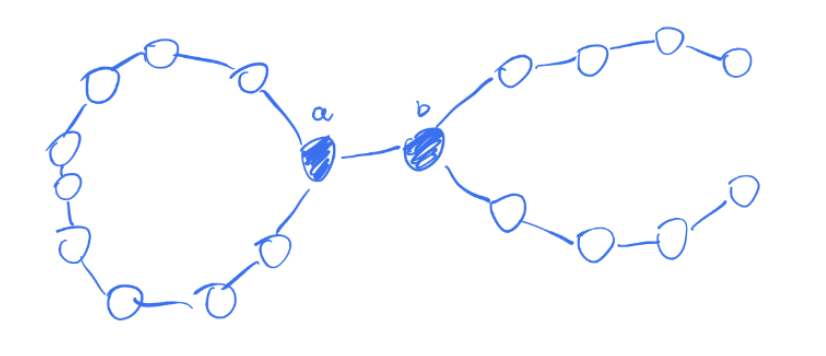

- In this example, nodes a and b have the same 4-hop neighborhood structure so they would not be classified differently by the model. A GNN with 5 layers would identify node a as being part of a cyclic subgraph (positive) and node b as not being part of a cyclic subgraph (negative).

### 3.2 Relation to Random Walk [7 Points]

(i) Let's explore similarity between message passing and random walks. Let h(l) i be the embedding of node i in layer l. Suppose that we are using a mean aggregator for message passing, and omit the learned linear transformation and non-linearity. 
If we start at a node u, and take a uniform random walk for 1 step, the expectation of the embedding of the node we end on is exactly the embedding of u in the next layer. What is the transition matrix of the random walk? Describe the transition matrix using the adjacency matrix A, and degree matrix D, a diagonal matrix where Di;i is the degree of node i.

- The entry (i,j) in the transition matrix is $1/D_{ij}$ for connected nodes i,j and 0 otherwise. So: $D^{(-1)}*A$

(ii) Suppose that we add skip connection in aggregation of 1/2. What is the corresponding transition matrix?

- The entry in the transition matrix is now 1/2 for each node self-entry (i.e. when i = j) and $1/2*D_{ij}$ for connected nodes (i,j), and 0 otherwise. So: $1/2 * D^{(-1)}*A + 1/2 * I$

### 3.3 Over-Smoothing Effect [5 Points]

(i) In Question 3.1 we see that increasing depth could give more expressive power. On the other hand, however, very large depth also gives rise to the undesirable effect of oversmoothing. Assume we are still using the aggregation function from part 3.2 (i). 
Show that the node embedding $h_i^{(l)}$ will converge as $l \to \infty$. Here we assume that the graph is connected and has no bipartite components. In practice, learnable weights, non-linearity and other architecture choices may alleviate the over-smoothing effect.

- From 3.2. (i), the transition matrix for message passing is $D^{(-1)}*A$. So, after l message passing, $h^{(l)} = (D^{(-1)}*A)^l * h$. TO BE COMPLETED!!
Proof that embedding converges, using Markov chain.??

### 3.4 Learning BFS with GNN [6 Points]

(i) Next we investigate the expressive power of GNN for learning simple graph algorithms. Consider breadth-first search (BFS), where at every step, nodes that are connected to visited nodes become visited. Suppose that we use GNN to learn to execute the BFS algorithm. Suppose that the embeddings are 1-dimensional. Initially, all nodes have input feature 0, except a source node which has input feature 1. At every step, nodes reached by BFS has embedding 1, and nodes not reached by BFS has embedding 0. Write the update rule at every step of BFS execution.

- The rule would be something like: At every step, for every node, if the node is visited or any of its neighbors is visited, then embedding = 1; otherwise embedding = 0.

(ii) Describe a message function and an aggregation function for the GNN such that it learns the task perfectly.

- Message passing: $h_i^{(l+1)} = M(h_j^{(l)}, h_i^{(l)})$
- Aggregation function: $h_i^{(l+1)} = max(h_j^{(l)})_{j\in N_i}$

## 4 GNN training [25 Points]

Attention mechanisms have become the state-of-the-art in many sequence-based tasks such as machine translation and learning sentence representations. One of the major benefits of attention- based mechanisms is their ability to focus on the most relevant parts of the input to make decisions. In this problem, we will see how attention mechanisms can be used to perform node classification of graph-structured data through the usage of Graph Attention Networks (GATs).

The building block of the Graph Attention Network is the graph attention layer, which is a variant of the aggregation function. Let N be the number of nodes and F be the dimension of the feature vector for each node. The input to each graph attentional layer is a set of node features h of dimension F. The output of each graph attentional layer is a new set of node features, which may have a new dimesion F'. This transformation of the input features into higher-level features performed by each graph attention layer consists of first a shared linear transformation parametrized by the weight matrix W (FxF') that is applied to every node and then the self-attention mechanism (which computes the attention coefficients that capture the importance of node j's features to node i $e_{ij} = a(Wh_i, Wh_j)$). 

To utilize graph structure in the attention mechanisms, we can use masked attention. In masked attention, we only compute $e_{ij}$ for nodes $j \in N_i$ where $N_i$ is some neighborhood of node i in the graph. To easily compare coeficients across different nodes, we normalize the coeficients across j using a softmax function.

For this problem, our attention mechanism a will be a single-layer feedforward neural network parametrized by a weight vector a of dimensions 2F' (attention coefficients $e_{ij} = a(Wh_i, Wh_j)$), followed by a LeakyReLU nonlinearity (with negative input slope 0.2). The coefficients will be normalized using softmax and these normalized attention coefficients ($\alpha_{ij}$) are used to compute a linear combination of the features corresponding to them. These aggregated features will serve as the final output features for every node.

In this problem, we will be implementing a general Graph Neural Network Stack, as well as Graph-SAGE and GATs. We will use our implementations to complete graph and node classification on two benchmarks:  
- CORA is a standard citation network benchmark dataset. In this dataset, nodes correspond to documents and edges correspond to undirected citations. Each node has a class label. The node features are elements of a bag-or-words representation of a document. For the Cora dataset, there are 2708 nodes, 5429 edges, 7 prediction classes for nodes, and 1433 features per node. We will be performing node classification on CORA.
- ENZYMES is a relatively small graph classi cation benchmark, containing graphs representing the protein tertiary structures from the BRENDA enzyme database. The task is to correctly assign each enzyme to one of the 6 EC top-level classes. It has 600 graphs, classified into 6 classes. The average number of nodes 32.63; average number of edges 62.14. Every node has attribute with 18 dimensions. We will be performing graph classi cation on ENZYMES.

### 4.1 Examine Dataset [1 Point]
First let's examine the data. To do this, you will need use train.py. How many nodes are there in the test set of CORA? How many graphs are there in the test set of ENZYMES?

In [6]:
import argparse
import time
import networkx as nx
import numpy as np
import torch
import torch.optim as optim
from torch_geometric.datasets import TUDataset
from torch_geometric.datasets import Planetoid
from torch_geometric.data import DataLoader
import torch_geometric.nn as pyg_nn
#import models
import q4_starter_code.models 
#import utils
import q4_starter_code.utils

In [26]:
# cora dataset
dataset = Planetoid(root='./data', name='Cora')
cora_dataset = dataset[0]

In [44]:
# number of nodes
print(f'Number of nodes: {cora_dataset.num_nodes}')
print(f'Number of edges: {cora_dataset.num_edges}')
print(f'Has isolated nodes: {cora_dataset.has_isolated_nodes()}')  # False
print(f'Has self-loops: {cora_dataset.has_self_loops()}')  # False
print(f'Is undirected: {cora_dataset.is_undirected()}')  # True => edge count is double the actual count because of the bi-directional edge information included

Number of nodes: 2708
Number of edges: 10556
Has isolated nodes: False
Has self-loops: False
Is undirected: True


In [56]:
print(f'Number of training nodes: {cora_dataset.train_mask.sum()}')
print(f'Number of validation nodes: {cora_dataset.val_mask.sum()}')
print(f'Number of test nodes: {cora_dataset.test_mask.sum()}')

Number of training nodes: 140
Number of validation nodes: 500
Number of test nodes: 1000


- There are 1000 test nodes.

In [57]:
# download enzymes dataset
dataset = TUDataset(root='./data', name='ENZYMES')
len(dataset)

600

- There are 600 graphs in the Enzymes dataset

Now we will implement the GNN Stack. Complete the forward method for GNNStack in models.py. For the purpose of this exercise, each layer of the GNN stack should contain a CONV -> RELU -> DROPOUT structure, where the CONV layer is specified by the model type. This forward call will be used for both the node classification task and graph
classification task later.

 - This task was done in the models.py file. This is the code chunk I added:


Complete the GraphSage implementation in models.py by filling in the init , forward, and message methods. Use Algorithm 1 given in Question 3 for reference. For the aggregate function, we will be using a dense layer followed by a RELU non-linearity, and a mean aggregator.

- This task was done in the models.py file.

Complete the GAT implementation by filling in the init , forward, and message methods. In init we will need to define the layers we need for the attention mechanism and for aggregating the final features. In forward, we will apply a linear transformation to the node feature matrix before starting message propagation. For message, we will implement GAT message passing following the equation 7.

- This task was done in the models.py file

Run GNN training for node classi cation task on the CORA dataset, and graph classification task on the ENZYMES dataset. Do this for GCN, GraphSage, and GAT. You will be using the Torch Geometric implementation of GCN, and your implementations of GraphSage and GAT. You can specify the model type to use in training by the flag-model.type of train.py. Write code to plot the validation accuracy over number of epochs. For each dataset, please plot the validation accuracy vs epochs for each of the models.

- This task was done in train.py; Plots are attached to submission

In [1]:
# function to plot performance:
def plot_performance(performance_dict, args, task):
    # Compare the validation loss
    for type in performance_dict.keys():
        plt.plot(performance_dict[type]['validation_acc'], label=type + ' validation accuracy')
    #    plt.plot(performance_dict[type]['training_loss'], label=type + ' training loss')
    plt.ylabel('validation accuracy')
    plt.xlabel('epochs ')
    plt.legend()
    plt.savefig('_'.join(['performance', args.dataset, task])+ '.png')
    plt.show()